# Final Project Submission

# 1.Business Understanding

## 1.1.*Overview*

> Influenza, commonly known as "the flu", is an infectious disease caused by influenza viruses.
Symptoms range from mild to severe and often include fever, runny nose, sore throat, muscle
pain, headache, coughing, and fatigue. These symptoms begin from one to four days after
exposure to the virus (typically two days) and last for about 2–8 days. Diarrhea and vomiting can
occur, particularly in children. Influenza may progress to pneumonia, which can be caused by the
virus or by a subsequent bacterial infection. Other complications of infection include acute
respiratory distress  syndrome, meningitis, encephalitis, and worsening of pre-existing health
problems such as asthma and cardiovascular disease.

> There are four types of influenza virus, termed influenza viruses A, B, C, and D. Aquatic birds
are the primary source of Influenza A virus (IAV), which is also widespread in various mammals,
including humans and pigs. Influenza B virus (IBV) and Influenza C virus (ICV) primarily infect
humans, and Influenza D virus (IDV) is found in cattle and pigs. IAV and IBV circulate in
humans and cause seasonal epidemics, and ICV causes a mild infection, primarily in children.
IDV can infect humans but is not known to cause illness. 

> According to the World Health Organization, people such as those aged 65 years and older,
young children and people with certain health conditions are at a higher risk of serious flu
complications. For the influenza A and B viruses that routinely spread in people, human
influenza viruses are responsible. Most experts believe that  in humans, influenza viruses are
primarily transmitted through respiratory droplets produced from coughing and sneezing. Less
often, a person might get flu by touching a surface or object that has flu droplets on it and
touching their own mouths, nose or possibly their eyes. The best way to reduce the risk of flu and
its serious complications is by getting vaccinated each year.

## *1.2.Business Objectives*

Listed below are ways in which the public can help curb the spread of the flu:

1.Take time to get a flu vaccine.
 * CDC recommends a yearly flu vaccine as the first and most important step in protecting against flu viruses.Flu vaccines help to reduce the burden of flu illnesses, hospitalizations and deaths on the health care system each year.
 
2.Take everyday preventive actions to stop the spread of germs.
 * Avoid close contact with people who are sick.
 * If you are sick, limit contact with others as much as possible to keep from infecting them.
 * Cover coughs and sneezes.
 * Cover your nose and mouth with a tissue and throw it away after use when you cough or sneeze.
 
3.Take flu antiviral drugs if your doctor prescribes them.
 * If you are sick with flu, antiviral drugs can be used to treat your illness.
 * Antiviral drugs are different from antibiotics. They are prescription medicines (pills, liquid or an inhaled powder) and are not available over-the-counter.

## *1.3.Determining the project goals*

Our main goal for the project is to determine how the following factors affect people's decisions to get the H1N1 and seasonal flu vaccine;
 * People's Backgrounds(age,education,race,sex,marital status,employment status)
 * Opinions on H1N1 vaccine and seasonal flu vaccine.
 * Health behaviours(washing hands,buying face masks,avoiding close contact with others,taking antiviral medication,avoiding touching your face)

## *1.4.Determining the Project success criteria*

We are going to use the following algorithms to come up with our predictive models.
 * Using binary relevance(Naive bayes, Logistic regression)
 * XG boost
 * Random forest
 * Multioutput classifier
 
The success metrics for the mentioned algorithms are:
 * Accuracy score of above 65%

## 2.Data Understanding

In [173]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2.1.Collecting the Data

This data was collected during the national 2009 H1N1 survey.

In [174]:
df = pd.read_csv("H1N1_Flu_Vaccines.csv",index_col='respondent_id')
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### 2.2 Description of the data

In [175]:
Description = pd.read_csv('Data Description.csv',header=0,squeeze=True,dtype=str,keep_default_na=False,encoding='unicode_escape')

pd.set_option('max_colwidth', 400)

Description

,respondent_id,Unique and random identifier.
0,h1n1_concern,Level of concern about the H1N1 flu.(0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.)
1,h1n1_knowledge,Level of knowledge about H1N1 flu.(0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.)
2,behavioral_antiviral_meds,Has taken antiviral medications. (binary)
3,behavioral_avoidance,Has avoided close contact with others with flu-like symptoms. (binary)
4,behavioral_face_mask,Has bought a face mask. (binary)
5,behavioral_wash_hands,Has frequently washed hands or used hand sanitizer. (binary)
6,behavioral_large_gatherings,Has reduced time at large gatherings. (binary)
7,behavioral_outside_home,Has reduced contact with people outside of own household. (binary)
8,behavioral_touch_face,"Has avoided touching eyes, nose, or mouth. (binary)"
9,doctor_recc_h1n1,H1N1 flu vaccine was recommended by doctor. (binary)


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [177]:
#finding the number of rows and columns

df.shape

(26707, 37)

In [178]:
# Describing the metrics of the dataset

df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [179]:
# checking for duplicated values

df.duplicated().sum()

0

In [180]:
df.isna().sum()/len(df) * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [181]:
df.groupby('census_msa')['hhs_geo_region'].value_counts()

census_msa                hhs_geo_region
MSA, Not Principle  City  lzgpxyit          2060
                          qufhixun          1568
                          bhuqouqj          1552
                          fpwskwrf          1541
                          kbazzjca           990
                          mlyzmhmf           961
                          lrircsnp           796
                          dqpwygqj           783
                          oxchjgsf           768
                          atmpeygn           626
MSA, Principle City       fpwskwrf          1202
                          lzgpxyit           991
                          kbazzjca           969
                          mlyzmhmf           956
                          qufhixun           815
                          oxchjgsf           771
                          lrircsnp           738
                          atmpeygn           622
                          bhuqouqj           514
                          dq

# 3.Data Preparation

### *3.1.Selecting the Data*

Guided by the goals for the project we are going to use the following data for our data analysis and modeling,our data set contains only categorical data.

 * People's Backgrounds
    * age_group
    * education
    * race
    * sex
    * employment_status
 * Opinions on H1N1 vaccine and seasonal flu vaccine.
    * opinion_h1n1_vacc_effective
    * opinion_h1n1_risk
    * opinion_seas_vacc_effective
    * opinion_h1n1_sick_from_vacc
    * opinion_seas_risk
    * opinion_seas_sick_from_vacc
 * Health behaviours
    * behavioral_avoidance
    * behavioral_antiviral_meds
    * behavioral_face_mask
    * behavioral_wash_hands
    * behavioral_large_gatherings
    * behavioral_outside_home
    * behavioral_touch_face
    * doctor_recc_h1n1
    * doctor_recc_seasonal
    * chronic_med_condition
    * child_under_6_months
    * health_worker
 * Geographical Location

### 3.2.Creating a new dataframe

In [182]:
new_df = df[["age_group","education","race", "sex","employment_status","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_seas_vacc_effective","opinion_h1n1_sick_from_vacc","opinion_seas_risk","opinion_seas_sick_from_vacc","behavioral_antiviral_meds","behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings","behavioral_outside_home","behavioral_touch_face","doctor_recc_h1n1","doctor_recc_seasonal","chronic_med_condition","child_under_6_months","health_worker","census_msa","hhs_geo_region","h1n1_vaccine","seasonal_vaccine"]]
new_df

,age_group,education,race,sex,employment_status,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,census_msa,hhs_geo_region,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Not in Labor Force,3.0,1.0,2.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Non-MSA,oxchjgsf,0,0
1,35 - 44 Years,12 Years,White,Male,Employed,5.0,4.0,4.0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",bhuqouqj,0,1
2,18 - 34 Years,College Graduate,White,Male,Employed,3.0,1.0,4.0,1.0,1.0,...,0.0,NaN,NaN,1.0,0.0,0.0,"MSA, Not Principle City",qufhixun,0,0
3,65+ Years,12 Years,White,Female,Not in Labor Force,3.0,3.0,5.0,5.0,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,"MSA, Principle City",lrircsnp,0,1
4,45 - 54 Years,Some College,White,Female,Employed,3.0,3.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",qufhixun,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,Not in Labor Force,3.0,1.0,5.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Non-MSA,qufhixun,0,0
26703,18 - 34 Years,College Graduate,White,Male,Employed,4.0,2.0,5.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,"MSA, Principle City",lzgpxyit,0,0
26704,55 - 64 Years,Some College,White,Female,NaN,4.0,4.0,5.0,2.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",lzgpxyit,0,1


### *3.3.Cleaning the Data*

#### 3.3.1 Missing Values

Missing data in the H1N1 seasonal flu vaccine data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

In [183]:
# checking the percenntage of misiing values

new_df.isna().sum()/len(new_df)* 100

age_group                      0.000000
education                      5.268282
race                           0.000000
sex                            0.000000
employment_status              5.477965
opinion_h1n1_vacc_effective    1.464036
opinion_h1n1_risk              1.452803
opinion_seas_vacc_effective    1.729884
opinion_h1n1_sick_from_vacc    1.479013
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
behavioral_antiviral_meds      0.265848
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_h1n1               8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
census_msa                     0.000000
hhs_geo_region                 0.000000
h1n1_vaccine                   0.000000


In [184]:
# converting  objects to categorical 
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 26615 non-null  float64 
 1   h1n1_knowledge               26591 non-null  float64 
 2   behavioral_antiviral_meds    26636 non-null  float64 
 3   behavioral_avoidance         26499 non-null  float64 
 4   behavioral_face_mask         26688 non-null  float64 
 5   behavioral_wash_hands        26665 non-null  float64 
 6   behavioral_large_gatherings  26620 non-null  float64 
 7   behavioral_outside_home      26625 non-null  float64 
 8   behavioral_touch_face        26579 non-null  float64 
 9   doctor_recc_h1n1             24547 non-null  float64 
 10  doctor_recc_seasonal         24547 non-null  float64 
 11  chronic_med_condition        25736 non-null  float64 
 12  child_under_6_months         25887 non-null  float64 
 13  h

In [186]:
# replacing missing values using mode

new_df = new_df.fillna(new_df.mode().iloc[0])

new_df.isnull().sum()

age_group                      0
education                      0
race                           0
sex                            0
employment_status              0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_seas_vacc_effective    0
opinion_h1n1_sick_from_vacc    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
behavioral_antiviral_meds      0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
census_msa                     0
hhs_geo_region                 0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

#### 3.3.2.Renaming geographical region

In [187]:
new_df["hhs_geo_region"].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [188]:
hhs_geo_region = {"hhs_geo_region":     {"lzgpxyit": "region_1", "fpwskwrf": "region_2","qufhixun": "region_3",
                                         "oxchjgsf":"region_4","kbazzjca":"region_5",
                                         "bhuqouqj":"region_6","mlyzmhmf":"region_7",
                                         "lrircsnp":"region_8","atmpeygn":"region_9","dqpwygqj":"region_10"}}

new_df = new_df.replace(hhs_geo_region)
new_df

,age_group,education,race,sex,employment_status,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,census_msa,hhs_geo_region,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Not in Labor Force,3.0,1.0,2.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Non-MSA,region_4,0,0
1,35 - 44 Years,12 Years,White,Male,Employed,5.0,4.0,4.0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",region_6,0,1
2,18 - 34 Years,College Graduate,White,Male,Employed,3.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,"MSA, Not Principle City",region_3,0,0
3,65+ Years,12 Years,White,Female,Not in Labor Force,3.0,3.0,5.0,5.0,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,"MSA, Principle City",region_8,0,1
4,45 - 54 Years,Some College,White,Female,Employed,3.0,3.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",region_3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,Not in Labor Force,3.0,1.0,5.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Non-MSA,region_3,0,0
26703,18 - 34 Years,College Graduate,White,Male,Employed,4.0,2.0,5.0,2.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,"MSA, Principle City",region_1,0,0
26704,55 - 64 Years,Some College,White,Female,Employed,4.0,4.0,5.0,2.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,"MSA, Not Principle City",region_1,0,1


#### 3.2.2.Renaming 

##### Renaming Opinion columns

In [189]:
new_df.opinion_h1n1_vacc_effective=new_df.opinion_h1n1_vacc_effective.replace({1 :"Not at all effective", 2 : "Not very effective",3 : "Don't know",
                                                             4 :"Somewhat effective", 5: "Very effective"})
 # opinion on effectiveness of seasonal flu vaccines                                                            
new_df.opinion_seas_vacc_effective=new_df.opinion_seas_vacc_effective.replace({1 :"Not at all effective", 2 : "Not very effective",3 : "Don't know",
                                                             4 :"Somewhat effective", 5: "Very effective"})

In [190]:
new_df.opinion_seas_sick_from_vacc= new_df.opinion_seas_sick_from_vacc.replace({1 : "Not at all worried",2: "Not very worried" ,3 :"Don't know",
                                                                                 4 : "Somewhat worried" ,5 :"Very worried"})
new_df.opinion_h1n1_risk=new_df.opinion_h1n1_risk.replace({1 :"Very Low", 2 : "Somewhat low",3: "Don't know",
                                                               4 : "Somewhat high", 5 :"Very high"})
new_df.opinion_h1n1_sick_from_vacc= new_df.opinion_h1n1_sick_from_vacc.replace({1 : "Not at all worried",2: "Not very worried" ,3 :"Don't know",
                                                                                 4 : "Somewhat worried" ,5 :"Very worried"})
new_df.opinion_h1n1_risk=new_df.opinion_h1n1_risk.replace({1 :"Very Low", 2 : "Somewhat low",3: "Don't know",
                                                               4 : "Somewhat high", 5 :"Very high"})
#opinion on gettibg sick from seasonal  flu without vaccines
new_df.opinion_seas_risk=new_df.opinion_seas_risk.replace({1 :"Very Low", 2 : "Somewhat low",3: "Don't know",
                                                               4 : "Somewhat high", 5 :"Very high"})

In [191]:
new_df['age_group'] =new_df['age_group'].str.rstrip(' Years')
new_df['age_group']= new_df['age_group'].astype(str)
new_df['age_cat']=new_df['age_group'].replace({'18 - 34':'youth','35 - 44':'young adults','45 - 54':'middleadults',
                                                '55 - 64':'older adults','65+':'elderly'})

In [192]:
# stripping and converting floats to integers
float_col = new_df.select_dtypes(include=['float64']) 
for col in float_col.columns.values:
     new_df[col] =new_df[col].astype('int64')

In [193]:
new_df.head()

,age_group,education,race,sex,employment_status,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,...,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,census_msa,hhs_geo_region,h1n1_vaccine,seasonal_vaccine,age_cat
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,55 - 64,< 12 Years,White,Female,Not in Labor Force,Don't know,Very Low,Not very effective,Not very worried,Very Low,...,0,0,0,0,0,Non-MSA,region_4,0,0,older adults
1,35 - 44,12 Years,White,Male,Employed,Very effective,Somewhat high,Somewhat effective,Somewhat worried,Somewhat low,...,0,0,0,0,0,"MSA, Not Principle City",region_6,0,1,young adults
2,18 - 34,College Graduate,White,Male,Employed,Don't know,Very Low,Somewhat effective,Not at all worried,Very Low,...,0,0,1,0,0,"MSA, Not Principle City",region_3,0,0,youth
3,65+,12 Years,White,Female,Not in Labor Force,Don't know,Don't know,Very effective,Very worried,Somewhat high,...,0,1,1,0,0,"MSA, Principle City",region_8,0,1,elderly
4,45 - 54,Some College,White,Female,Employed,Don't know,Don't know,Don't know,Not very worried,Very Low,...,0,0,0,0,0,"MSA, Not Principle City",region_3,0,0,middleadults


### *3.3.Exploratory Data Analysis*

### 3.3.1.Univariate Analysis

#### 3.3.1.1.People's Background

#### 3.3.1.1.1.Age

In [194]:
def count_plot1(data,column):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x=column,data=data,order=data[column].value_counts().index,palette='Blues')
    plt.title(f'{column} count plot')
    plt.ylabel('count')
    plt.show

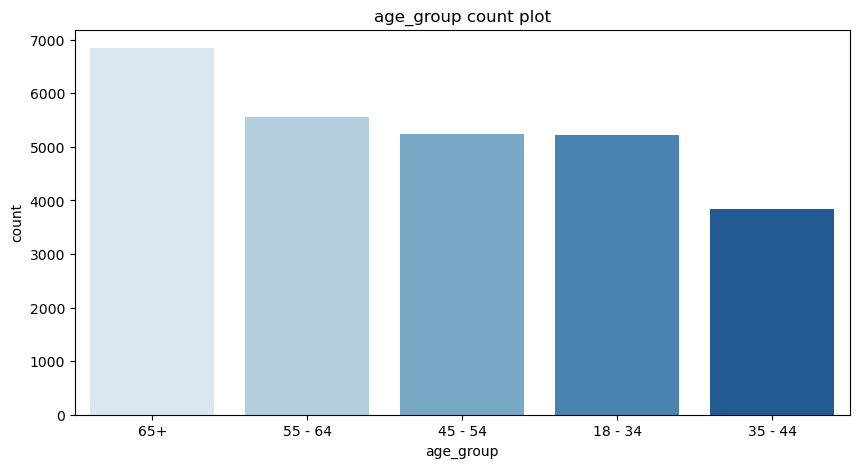

In [195]:
count_plot1(new_df,'age_group')

The highest age group is 65 years and above and the lowest age group is 35-44 years

#### 3.3.1.1.2.Education

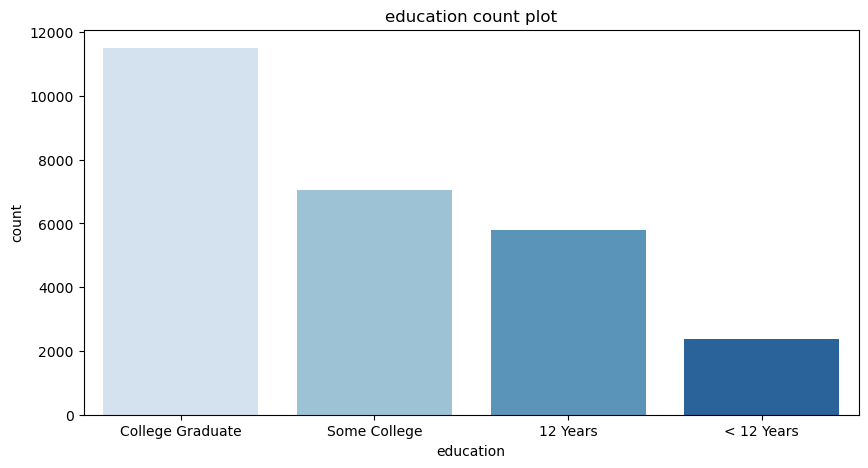

In [196]:
count_plot1(new_df,'education')

College graduates had the highest count while below 12 years had the lowest count

#### 3.3.1.1.3.Race

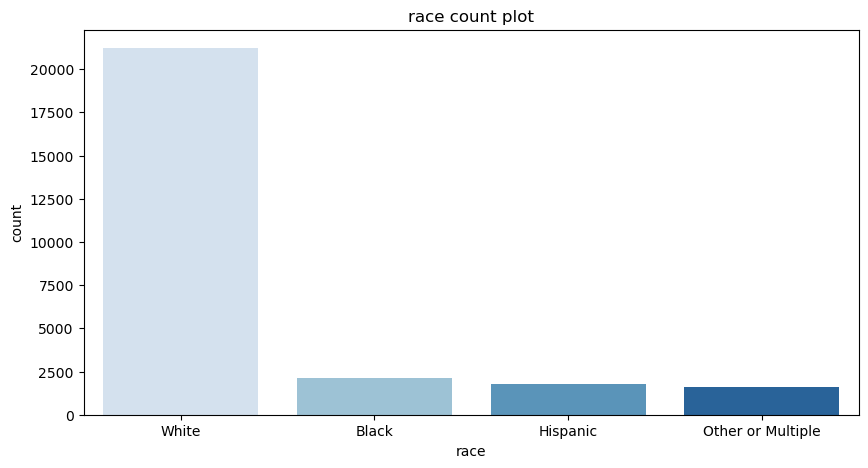

In [197]:
count_plot1(new_df,'race')

#### 3.3.1.1.3.Sex

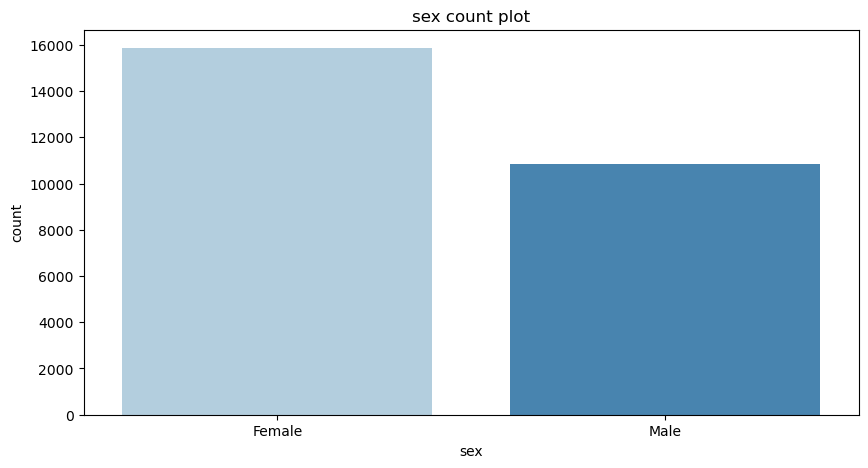

In [198]:
count_plot1(new_df,'sex')

A larger part of the population are female

#### 3.3.1.1.4.Employment_status

In [199]:
def bar_plot(data,column):
    X_count= data[column].value_counts().head(20).sort_values()
    plt.barh(X_count.index,X_count,color='lightblue')
    plt.title(f'{column} count')
    plt.xlabel('employment status')
    plt.show

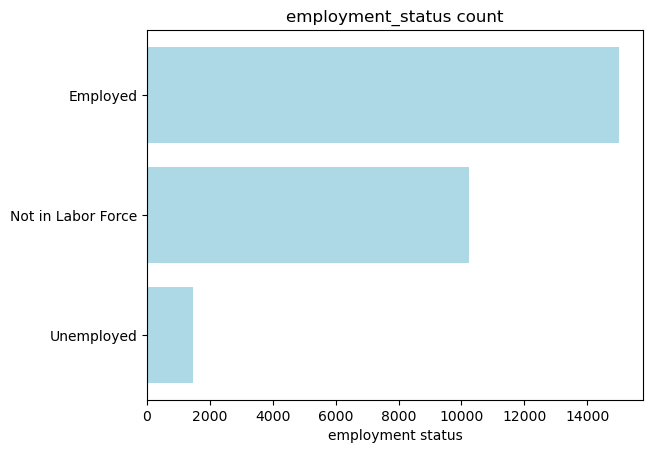

In [200]:
bar_plot(new_df,'employment_status')

There is a high rate of employment compared to unemployment

#### 3.3.1.2.Opinions on H1N1 vaccine and seasonal flu vaccine

##### 3.3.1.2.1.H1N1 vaccine

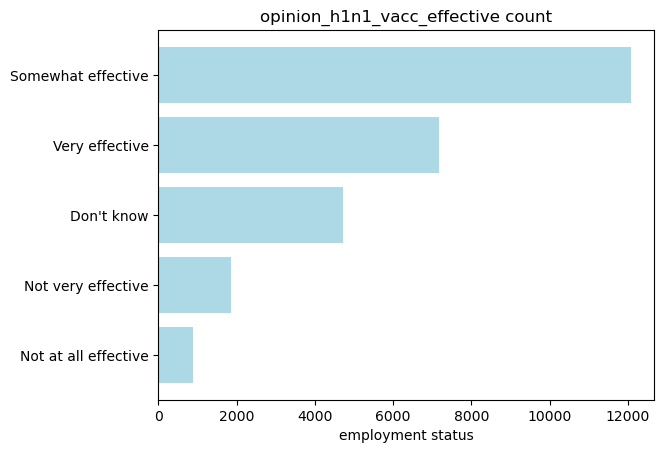

In [201]:
bar_plot(new_df,'opinion_h1n1_vacc_effective')

The most popular opinion is that the vaccine is somewhat effective.

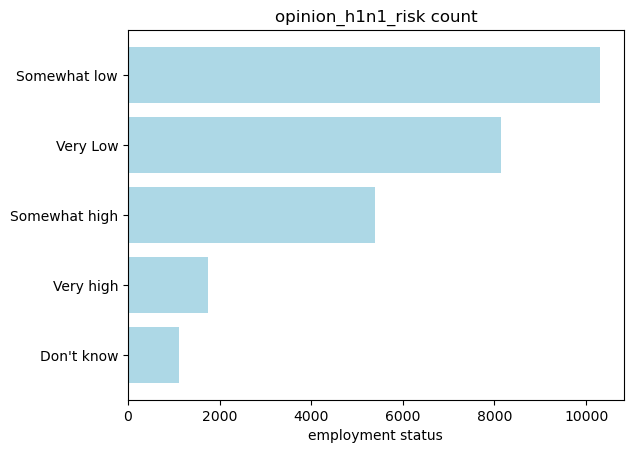

In [202]:
bar_plot(new_df,'opinion_h1n1_risk')

Most people believe they will not get the flu even if they dont get the h1n1 flu vaccine.

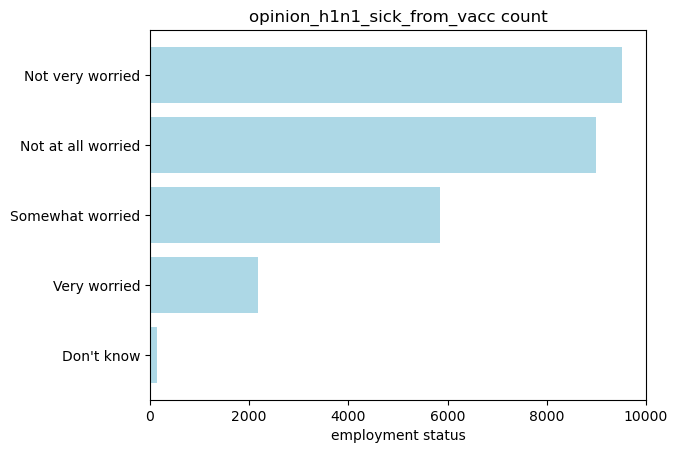

In [203]:
bar_plot(new_df,'opinion_h1n1_sick_from_vacc')

Most people are not very worried about getting sick after getting the h1n1 flu vaccine.

##### 3.3.1.2.2.Seasonal flu vaccine

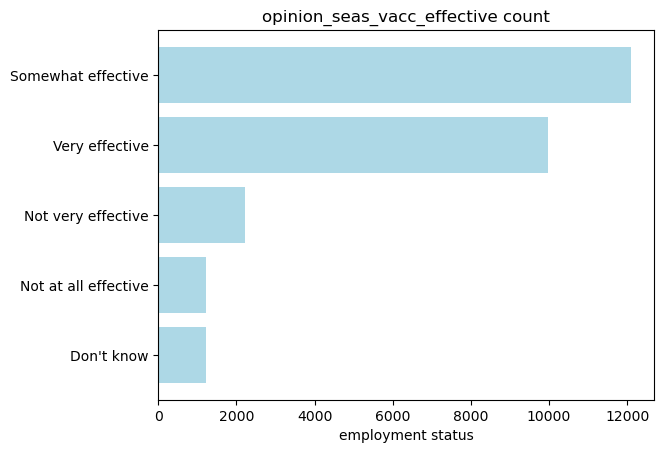

In [204]:
bar_plot(new_df,'opinion_seas_vacc_effective')

The most popular opinion is that the seasonal flu is somewhat effective

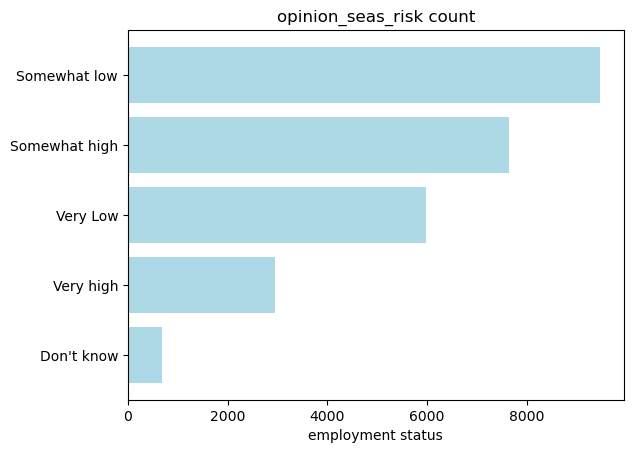

In [205]:
bar_plot(new_df,'opinion_seas_risk')

Most people believe they will not get the seasonal flu even if they dont get the seasonal flu vaccine.

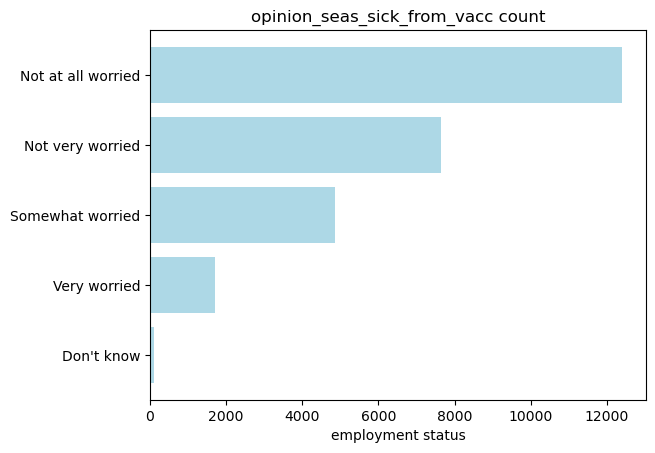

In [206]:
bar_plot(new_df,'opinion_seas_sick_from_vacc')

Most people are not worried at all about being sick from the vaccine.

#### 3.3.1.3.Health behaviours

##### 3.3.1.3.1.behavioral_antiviral_meds

In [207]:
def count_plot(data,column):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x=column,data=data)
    plt.title(f'{column} count plot')
    plt.ylabel('count')
    plt.show

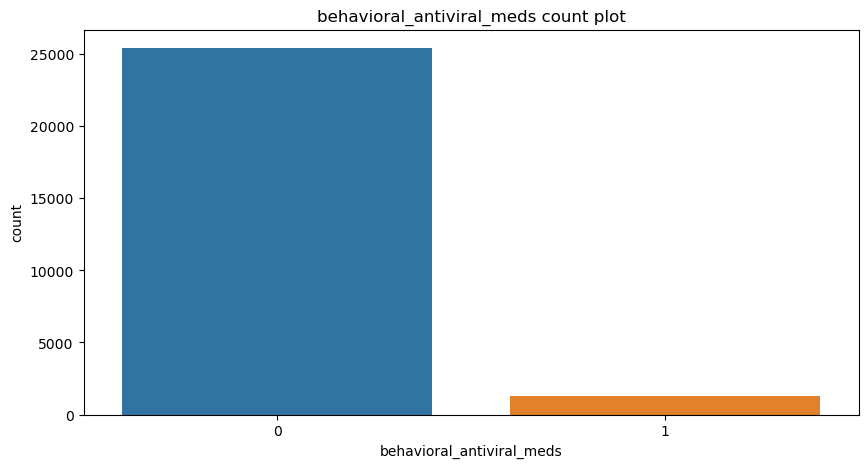

In [208]:
count_plot(new_df,'behavioral_antiviral_meds')

A larger percentage of the population have not taken antiviral medication

##### 3.3.1.3.2.behavioral_face_mask

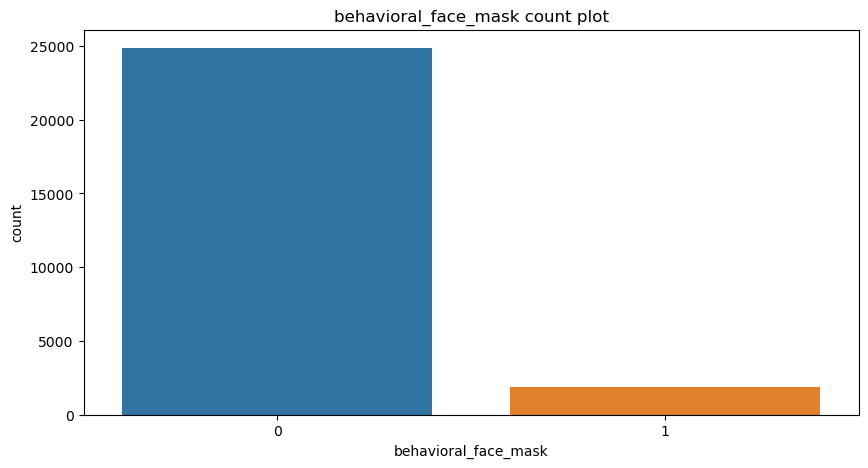

In [209]:
count_plot(new_df,'behavioral_face_mask')

A larger percentage of the population do not buy face masks.

##### 3.3.1.3.3.behavioral_wash_hands

In [210]:
# defining a function to get doughnuts
def get_doughnut(data,column):
    count=data[column].value_counts()
    plt.figure(figsize=(10,8))
    c='lightblue','orange'
    mylabels='No','Yes'
    plt.pie(count,labels=mylabels,colors=c,autopct='%1.1f%%', pctdistance=0.85)
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    plt.title(f'{column}')

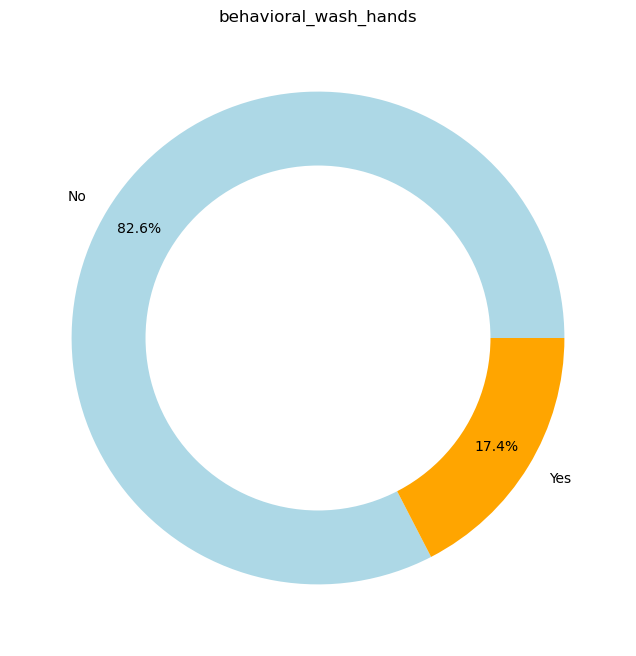

In [211]:
get_doughnut(new_df,'behavioral_wash_hands')

Most don't frequently wash their hands or use hand sanitiser.

##### 3.3.1.3.4.behavioral_large_gatherings

<AxesSubplot:xlabel='behavioral_large_gatherings', ylabel='count'>

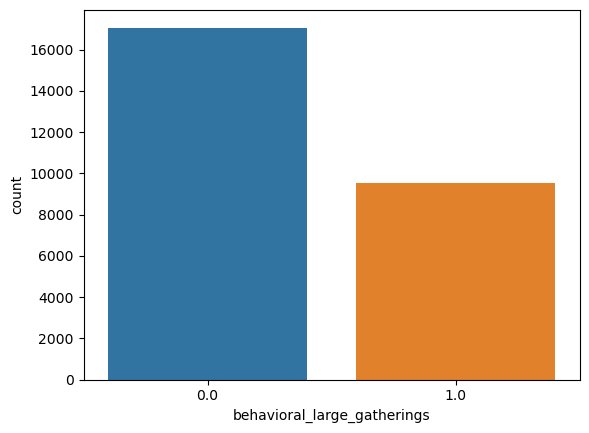

In [212]:
sns.countplot(x ='behavioral_large_gatherings', data = df)

Most of the people have not reduced their time at large gatherings.

##### 3.3.1.3.5.behavioral_touch_face

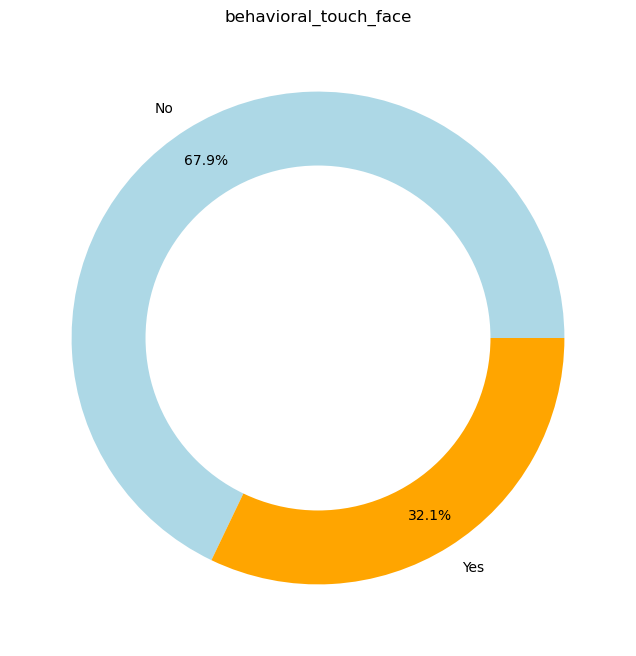

In [213]:
get_doughnut(new_df,'behavioral_touch_face')

Most people have noot avoided touching their face.

#### 3.3.1.4. Geographical Location

##### 3.3.1.4.hhs_geo_region

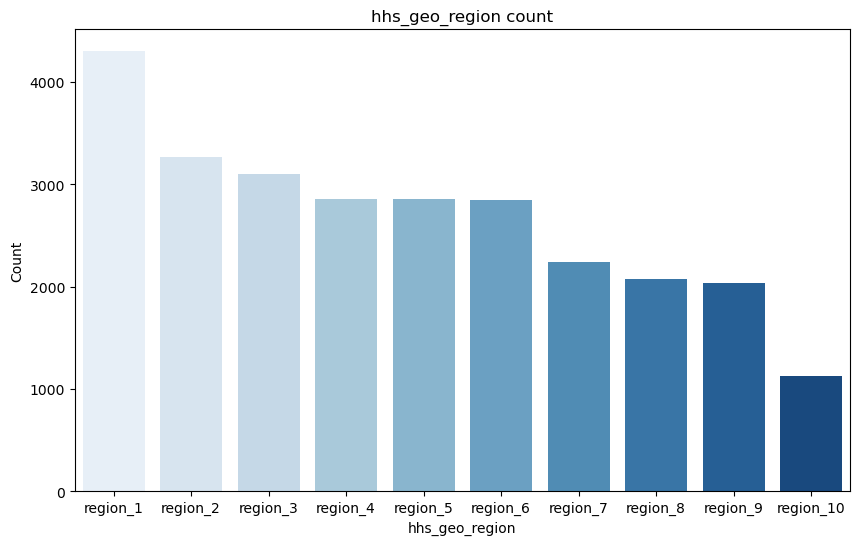

In [214]:
# A bar graph showing the hhs_geo_region 

plt.figure(figsize=(10,6))
sns.countplot(x='hhs_geo_region', data= new_df,order=new_df["hhs_geo_region"].value_counts().index,palette="Blues")
plt.title('hhs_geo_region count')
plt.xlabel('hhs_geo_region')
plt.ylabel('Count')
plt.show()

Region 1 is the most populated region.

##### 3.3.1.4.census_msa

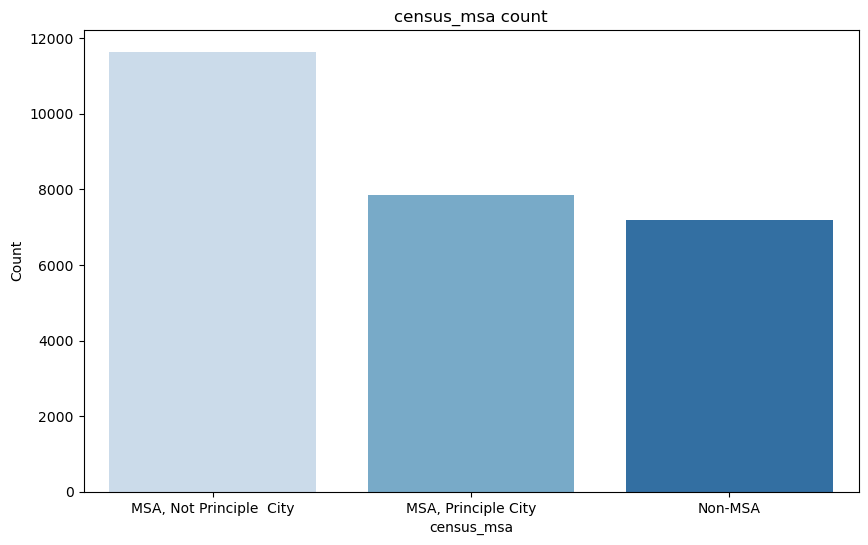

In [215]:
# A bar graph showing the census_msa

plt.figure(figsize=(10,6))
sns.countplot(x='census_msa', data= new_df,order=new_df["census_msa"].value_counts().index,palette="Blues")
plt.title('census_msa count')
plt.xlabel('census_msa')
plt.ylabel('Count')
plt.show();

The metropolitan that is not a principle city had the highest population according to the census.

### 3.3.1.Bivariate Analysis

### 3.3.1.1. Age 

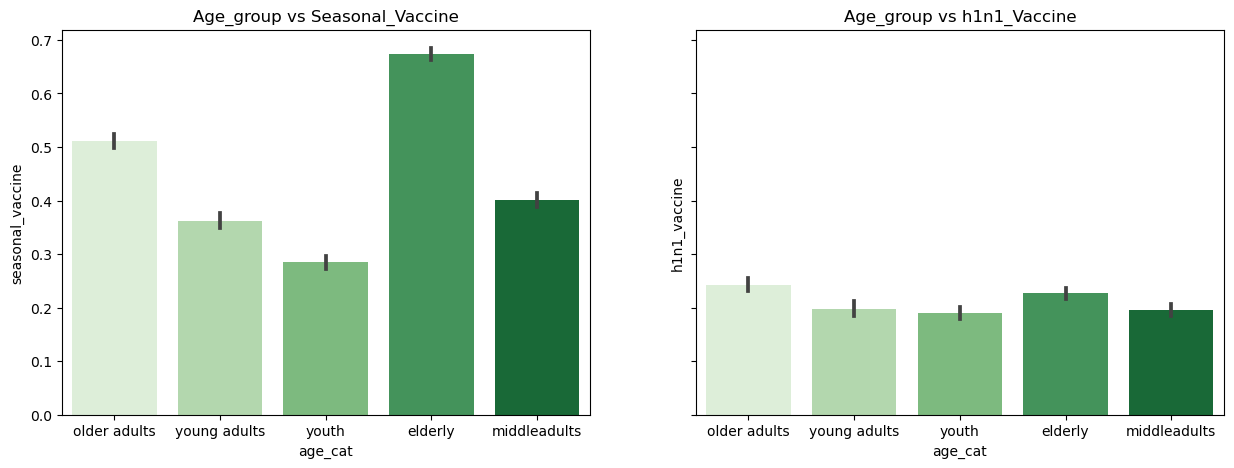

In [216]:
# Age vs H1N1 Vaccine
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],x='age_cat', y='seasonal_vaccine', data=new_df, palette = 'Greens')
axes[0].set_title('Age_group vs Seasonal_Vaccine')
sns.barplot(ax=axes[1],x='age_cat', y='h1n1_vaccine', data=new_df, palette = 'Greens')
axes[1].set_title('Age_group vs h1n1_Vaccine');

The elderly and older adults seem to have taken the h1n1 and seasonal flu vaccine more than other age groups

### 3.3.1.2. Education

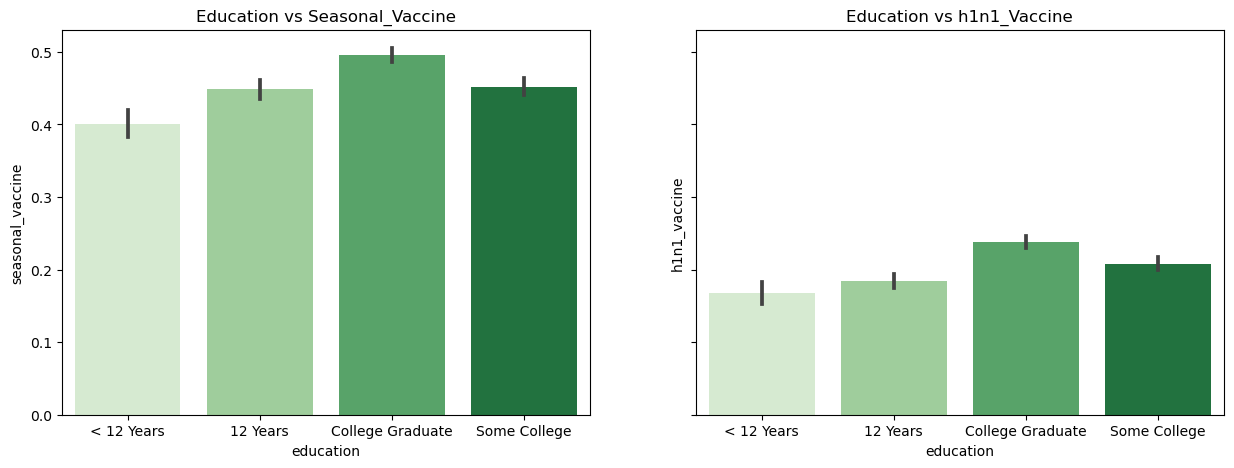

In [217]:
# Plot showing the education status of those who took H1N1 and Seasonal Flu vaccine

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],x='education', y='seasonal_vaccine', data=new_df, palette = 'Greens')
axes[0].set_title('Education vs Seasonal_Vaccine')
sns.barplot(ax=axes[1],x='education', y='h1n1_vaccine', data=new_df, palette = 'Greens')
axes[1].set_title('Education vs h1n1_Vaccine');

### 3.3.1.3 Gender

Text(0.5, 1.0, 'Gender vs h1n1_Vaccine')

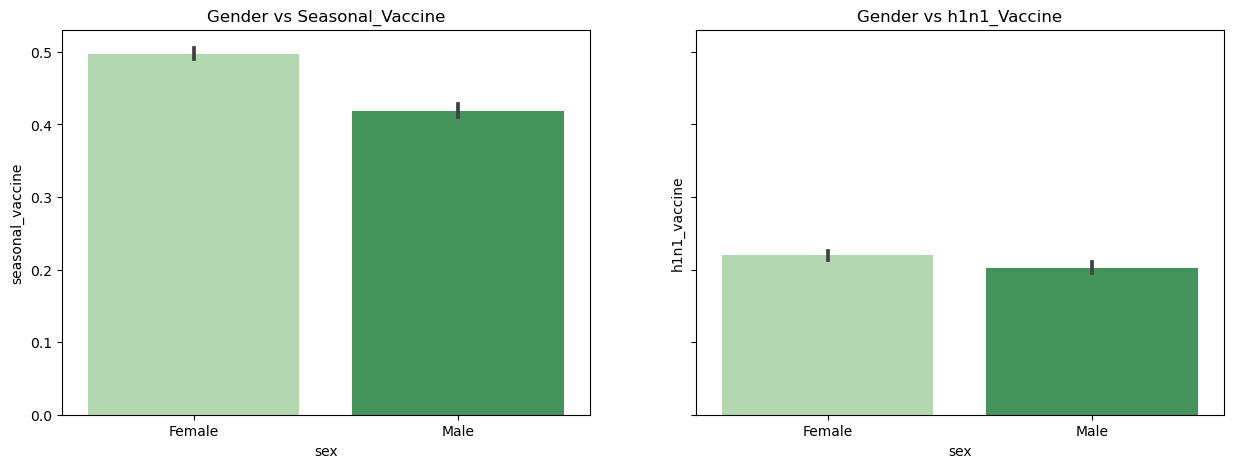

In [218]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],x='sex', y='seasonal_vaccine', data=new_df, palette = 'Greens')
axes[0].set_title('Gender vs Seasonal_Vaccine')
sns.barplot(ax=axes[1],x='sex', y='h1n1_vaccine', data=new_df, palette = 'Greens')
axes[1].set_title('Gender vs h1n1_Vaccine')

females tend to get more vaccines compared to the males

### 3.3.1.4 Employment status

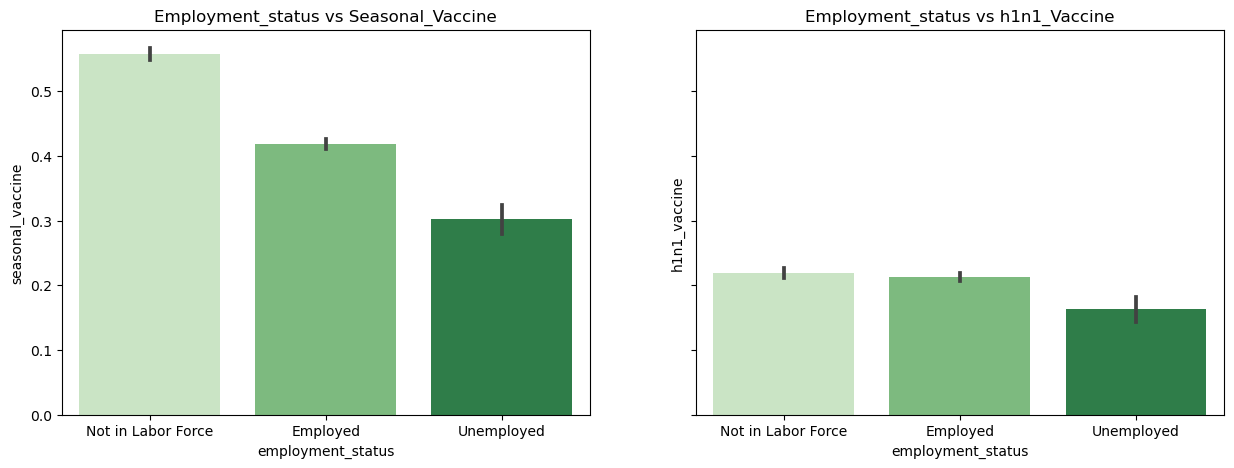

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0],x='employment_status', y='seasonal_vaccine', data=new_df, palette = 'Greens')
axes[0].set_title('Employment_status vs Seasonal_Vaccine')
sns.barplot(ax=axes[1],x='employment_status', y='h1n1_vaccine', data=new_df, palette = 'Greens')
axes[1].set_title('Employment_status vs h1n1_Vaccine');

Those not in the labour force have had a huge turnout of taking the vaccines compared to those who are employed.

### 3.3.1.5 Opinions

In [220]:
def count_plot(data,column1,column2):
    
    plt.figure(figsize=(10,5))
    sns.countplot(x=column1,data=data,hue=column2)
    plt.title(f'{column1.name} and {column2.name} count plot')
    plt.ylabel('count')
    plt.show

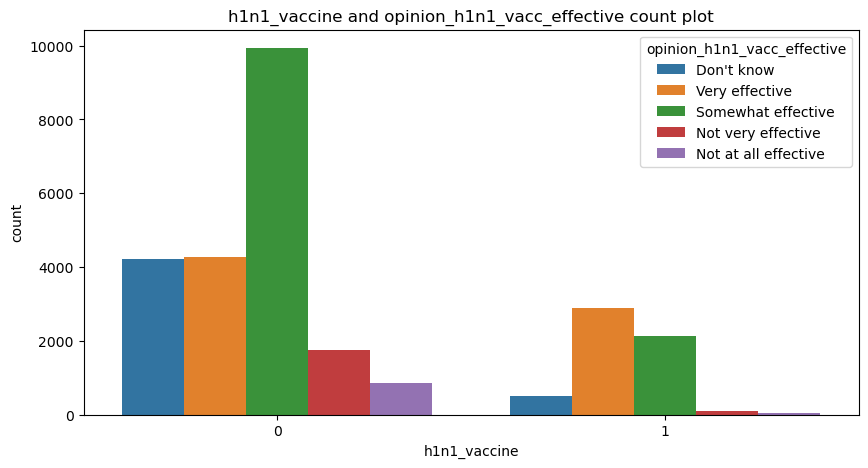

In [221]:
count_plot(new_df, new_df['h1n1_vaccine'],new_df['opinion_h1n1_vacc_effective'])

### 3.3.1.6 Correlation

In [222]:
# checking the correlations of the vaccines with the target of seasonal_vaccine

corr = new_df.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Target', 'level_1':'Features', 0:'Correlation_Values'})
corr = corr.loc[corr['Target'] == 'seasonal_vaccine']
corr.sort_values(by = 'Correlation_Values', ascending = False)

,Target,Features,Correlation_Values
168,seasonal_vaccine,seasonal_vaccine,1.000000
167,seasonal_vaccine,h1n1_vaccine,0.377143
163,seasonal_vaccine,doctor_recc_seasonal,0.360696
162,seasonal_vaccine,doctor_recc_h1n1,0.198560
164,seasonal_vaccine,chronic_med_condition,0.169465
166,seasonal_vaccine,health_worker,0.126977
161,seasonal_vaccine,behavioral_touch_face,0.119925
158,seasonal_vaccine,behavioral_wash_hands,0.112254
159,seasonal_vaccine,behavioral_large_gatherings,0.063722
160,seasonal_vaccine,behavioral_outside_home,0.053287


In [223]:
# checking the correlations of the vaccines with the target of h1n1_vaccine

corr = new_df.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Target', 'level_1':'Features', 0:'Correlation_Values'})
corr = corr.loc[corr['Target'] == 'h1n1_vaccine']
corr.sort_values(by = 'Correlation_Values', ascending = False)

,Target,Features,Correlation_Values
154,h1n1_vaccine,h1n1_vaccine,1.000000
149,h1n1_vaccine,doctor_recc_h1n1,0.394086
155,h1n1_vaccine,seasonal_vaccine,0.377143
150,h1n1_vaccine,doctor_recc_seasonal,0.218976
153,h1n1_vaccine,health_worker,0.168056
151,h1n1_vaccine,chronic_med_condition,0.094360
145,h1n1_vaccine,behavioral_wash_hands,0.074570
148,h1n1_vaccine,behavioral_touch_face,0.070855
144,h1n1_vaccine,behavioral_face_mask,0.070413
152,h1n1_vaccine,child_under_6_months,0.066712


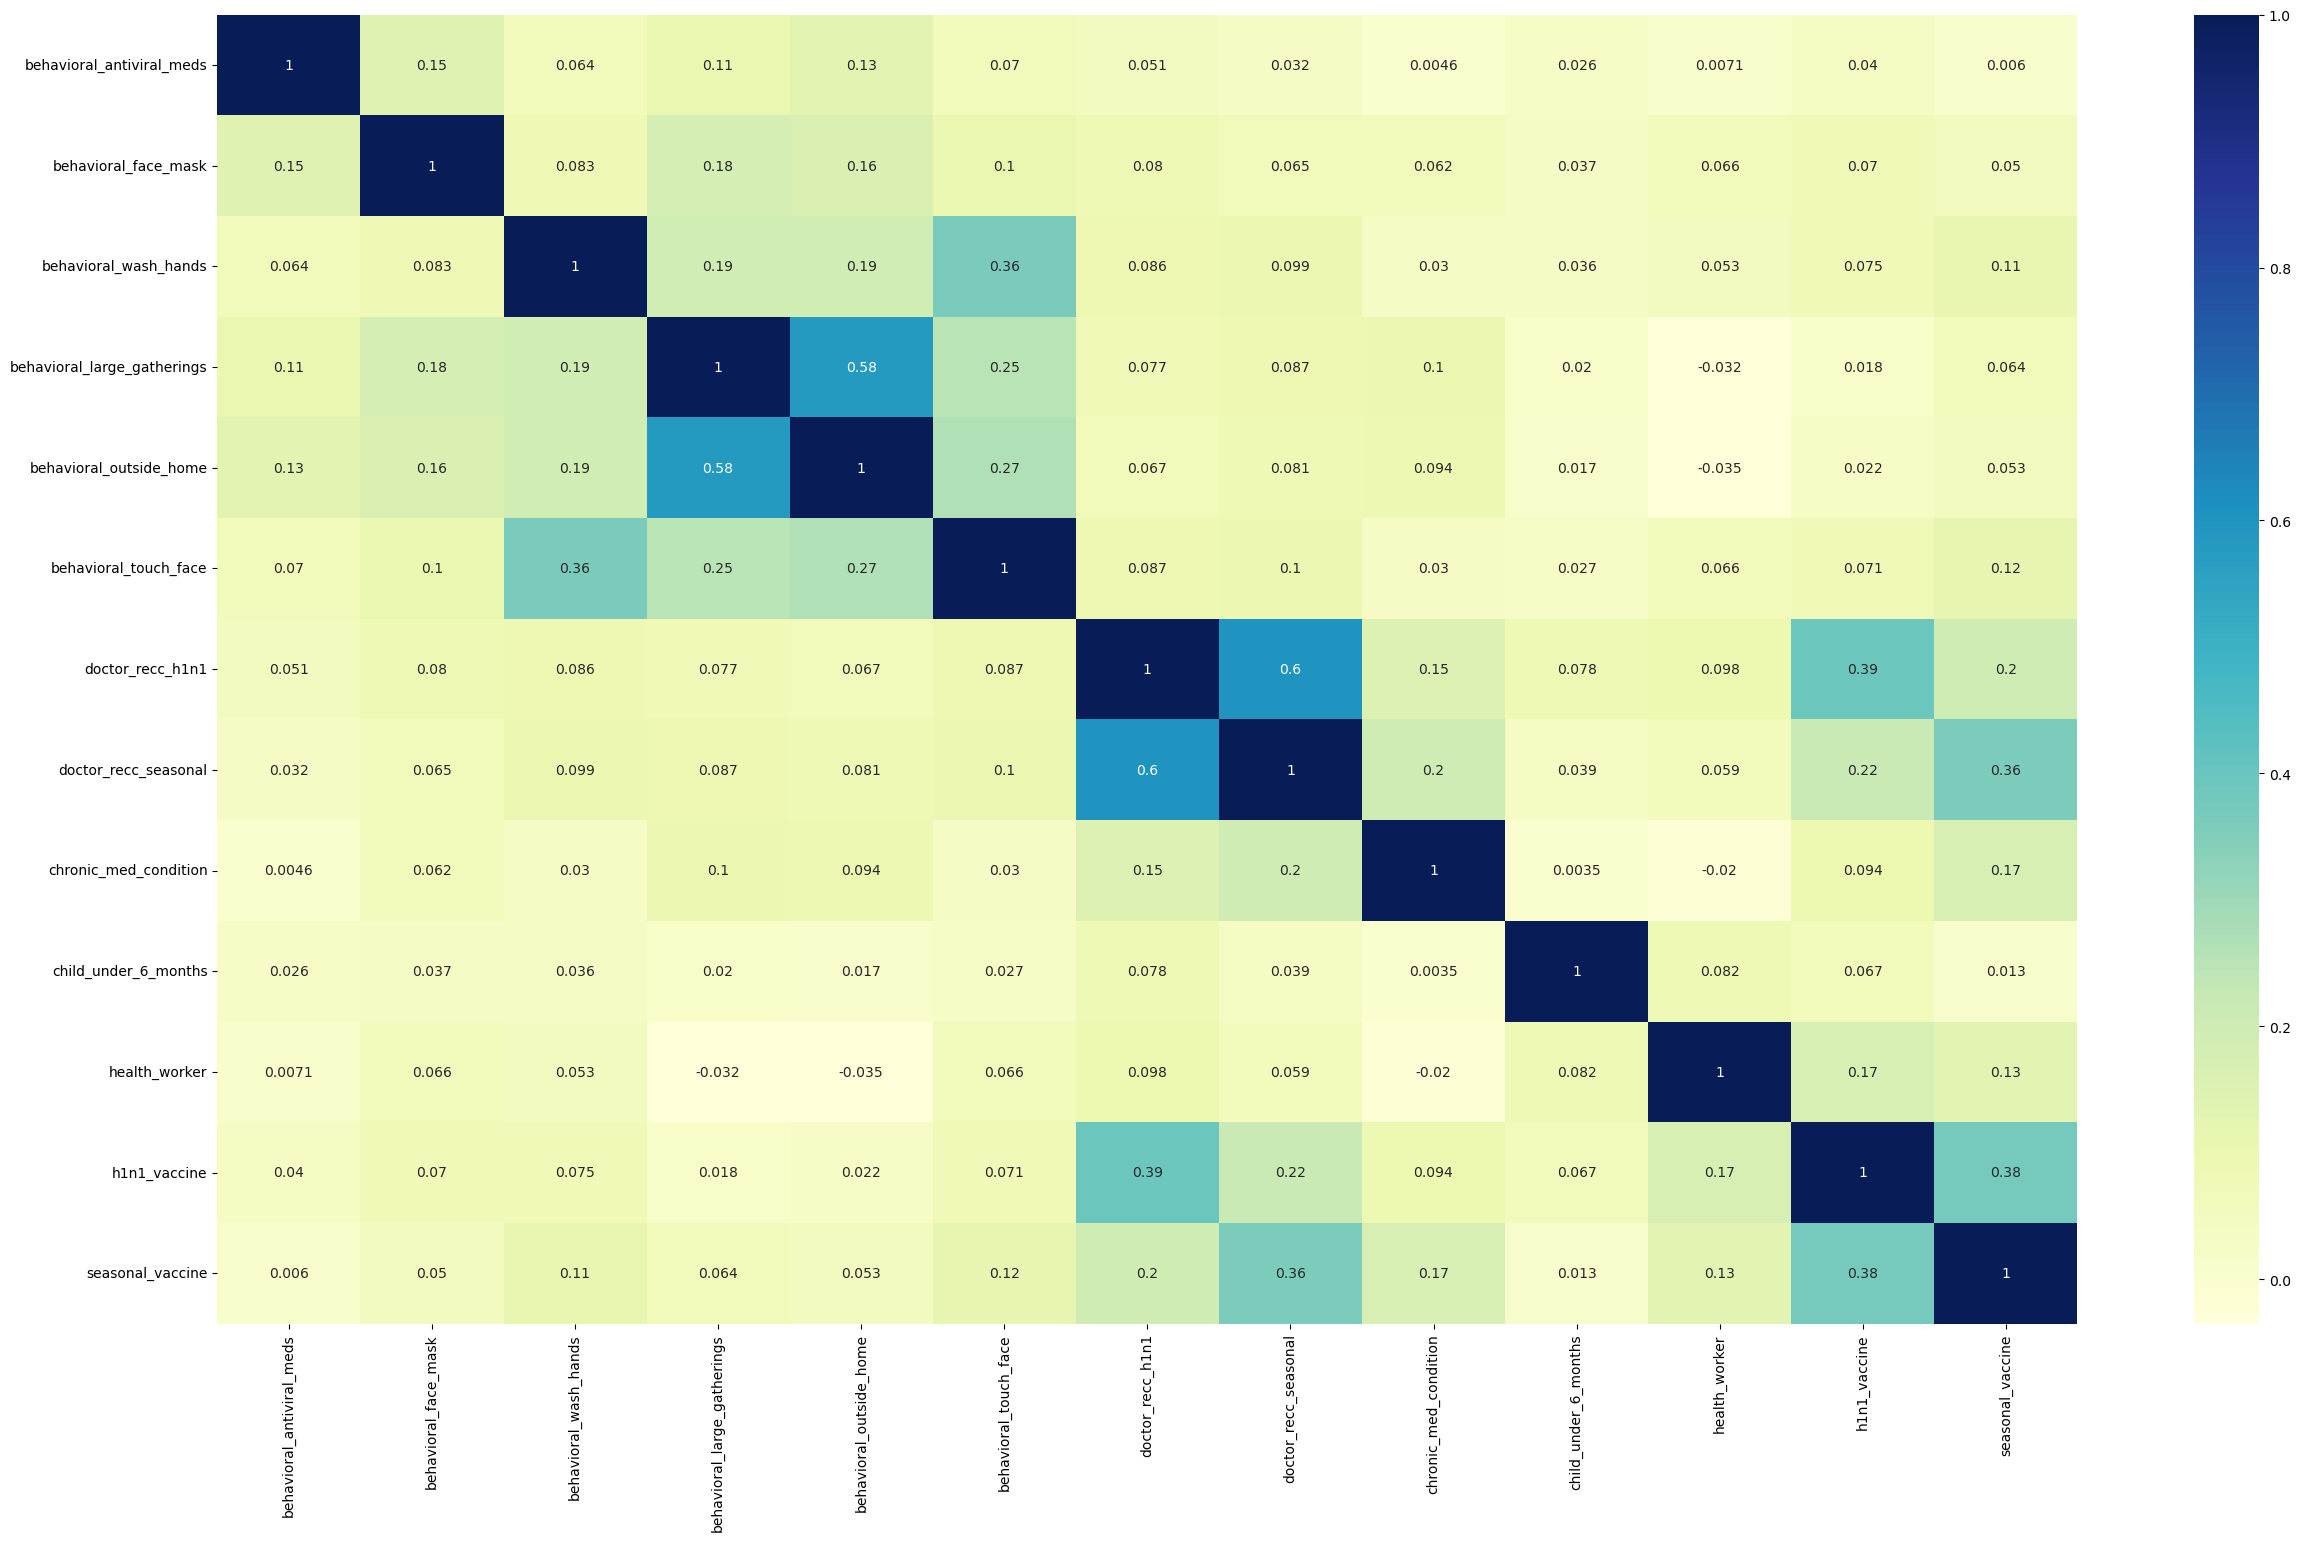

In [224]:
# plotting correlation heatmap
# plotting correlation heatmap
plt.figure(figsize=(30,17))
#sns.set_context("paper", font_scale= 3)
dataplot = sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap

In [225]:
new_df.drop('age_group',axis=1)

,education,race,sex,employment_status,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_h1n1_sick_from_vacc,opinion_seas_risk,opinion_seas_sick_from_vacc,...,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,census_msa,hhs_geo_region,h1n1_vaccine,seasonal_vaccine,age_cat
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,< 12 Years,White,Female,Not in Labor Force,Don't know,Very Low,Not very effective,Not very worried,Very Low,Not very worried,...,0,0,0,0,0,Non-MSA,region_4,0,0,older adults
1,12 Years,White,Male,Employed,Very effective,Somewhat high,Somewhat effective,Somewhat worried,Somewhat low,Somewhat worried,...,0,0,0,0,0,"MSA, Not Principle City",region_6,0,1,young adults
2,College Graduate,White,Male,Employed,Don't know,Very Low,Somewhat effective,Not at all worried,Very Low,Not very worried,...,0,0,1,0,0,"MSA, Not Principle City",region_3,0,0,youth
3,12 Years,White,Female,Not in Labor Force,Don't know,Don't know,Very effective,Very worried,Somewhat high,Not at all worried,...,0,1,1,0,0,"MSA, Principle City",region_8,0,1,elderly
4,Some College,White,Female,Employed,Don't know,Don't know,Don't know,Not very worried,Very Low,Somewhat worried,...,0,0,0,0,0,"MSA, Not Principle City",region_3,0,0,middleadults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,Some College,White,Female,Not in Labor Force,Don't know,Very Low,Very effective,Not at all worried,Somewhat low,Not very worried,...,0,0,0,0,0,Non-MSA,region_3,0,0,elderly
26703,College Graduate,White,Male,Employed,Somewhat effective,Somewhat low,Very effective,Not very worried,Very Low,Not at all worried,...,1,1,0,0,1,"MSA, Principle City",region_1,0,0,youth
26704,Some College,White,Female,Employed,Somewhat effective,Somewhat high,Very effective,Not very worried,Somewhat high,Not very worried,...,0,0,0,0,0,"MSA, Not Principle City",region_1,0,1,older adults


### 3.3.2.Data Preprocessing

#### 3.3.2.1. Renaming Opinion columns to numerical

In [226]:
new_df.opinion_h1n1_vacc_effective=new_df.opinion_h1n1_vacc_effective.replace({"Not at all effective":1, "Not very effective":2, "Don't know":3,
                                                             "Somewhat effective":4,"Very effective":5})
 # opinion on effectiveness of seasonal flu vaccines                                                            
new_df.opinion_seas_vacc_effective=new_df.opinion_seas_vacc_effective.replace({"Not at all effective":1, "Not very effective":2, "Don't know":3,
                                                             "Somewhat effective":4,"Very effective":5})

In [227]:
new_df.opinion_seas_sick_from_vacc= new_df.opinion_seas_sick_from_vacc.replace({ "Not at all worried":1,"Not very worried":2 ,"Don't know":3,
                                                                                "Somewhat worried":4 ,"Very worried":5})
new_df.opinion_h1n1_risk=new_df.opinion_h1n1_risk.replace({"Very Low":1,"Somewhat low":2,"Don't know":3,
                                                               "Somewhat high":4,"Very high":5})
new_df.opinion_h1n1_sick_from_vacc= new_df.opinion_h1n1_sick_from_vacc.replace({"Very Low":1,"Somewhat low":2,"Don't know":3,
                                                               "Somewhat high":4,"Very high":5})
new_df.opinion_h1n1_risk=new_df.opinion_h1n1_risk.replace({"Very Low":1,"Somewhat low":2,"Don't know":3,
                                                               "Somewhat high":4,"Very high":5})
#opinion on gettibg sick from seasonal  flu without vaccines
new_df.opinion_seas_risk=new_df.opinion_seas_risk.replace({"Very Low":1,"Somewhat low":2,"Don't know":3,
                                                               "Somewhat high":4,"Very high":5})

#### 3.3.2.2 Selection of the data

With our features ready, we can begin by running some preliminary models. We'll adopt a few different techniques since we have a unique problem here with multiple targets.

In [228]:
features=new_df.drop(columns=['h1n1_vaccine','seasonal_vaccine'],axis=1)
labels = new_df.iloc[:,[24,25]]

#### 3.3.2.3 One hot encoding  our predictor variables

In [229]:
X=pd.get_dummies(features)
y=labels

#### 3.3.2.4 Scaling our data using min max scaler

In [230]:

scaler = MinMaxScaler()
features = scaler.fit_transform(X)


#### 3.3.2.5 Feature Selection Using Kbest

In [231]:
# selecting the best features to use on our model
bestfeatures = SelectKBest(score_func=chi2, k=30)

We looked at the model and decided to select we the best 30 categories.

#### 3.3.2.5.1 Fitting Kbest

In [232]:
fit = bestfeatures.fit(X,y)

In [233]:
X.head()

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,behavioral_antiviral_meds,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,hhs_geo_region_region_5,hhs_geo_region_region_6,hhs_geo_region_region_7,hhs_geo_region_region_8,hhs_geo_region_region_9,age_cat_elderly,age_cat_middleadults,age_cat_older adults,age_cat_young adults,age_cat_youth
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,2,1,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,5,4,4,2,4,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,3,1,4,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,3,5,4,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
4,3,3,3,1,4,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [234]:
fit = bestfeatures.fit(X,y)

#### 3.3.2.5.2 Feature importance

[0.04540134 0.04930359 0.05835309 0.07951883 0.03618166 0.0081343
 0.01028663 0.01436901 0.02166742 0.02158737 0.02077613 0.05631842
 0.05807814 0.02052974 0.01116125 0.01987089 0.00697422 0.00473132
 0.00510267 0.00529321 0.01314729 0.01374238 0.00896037 0.01711069
 0.01566739 0.0075446  0.00670119 0.00685754 0.01247741 0.01594808
 0.01595685 0.01295242 0.01286427 0.00569785 0.00088762 0.01603951
 0.01708766 0.01499386 0.00837039 0.0209704  0.01877915 0.01796012
 0.01635227 0.00722152 0.01500207 0.01490472 0.01371079 0.0134949
 0.01479206 0.01170663 0.01179732 0.01172795 0.0123568  0.00521502
 0.00545237 0.00495234 0.00695698]


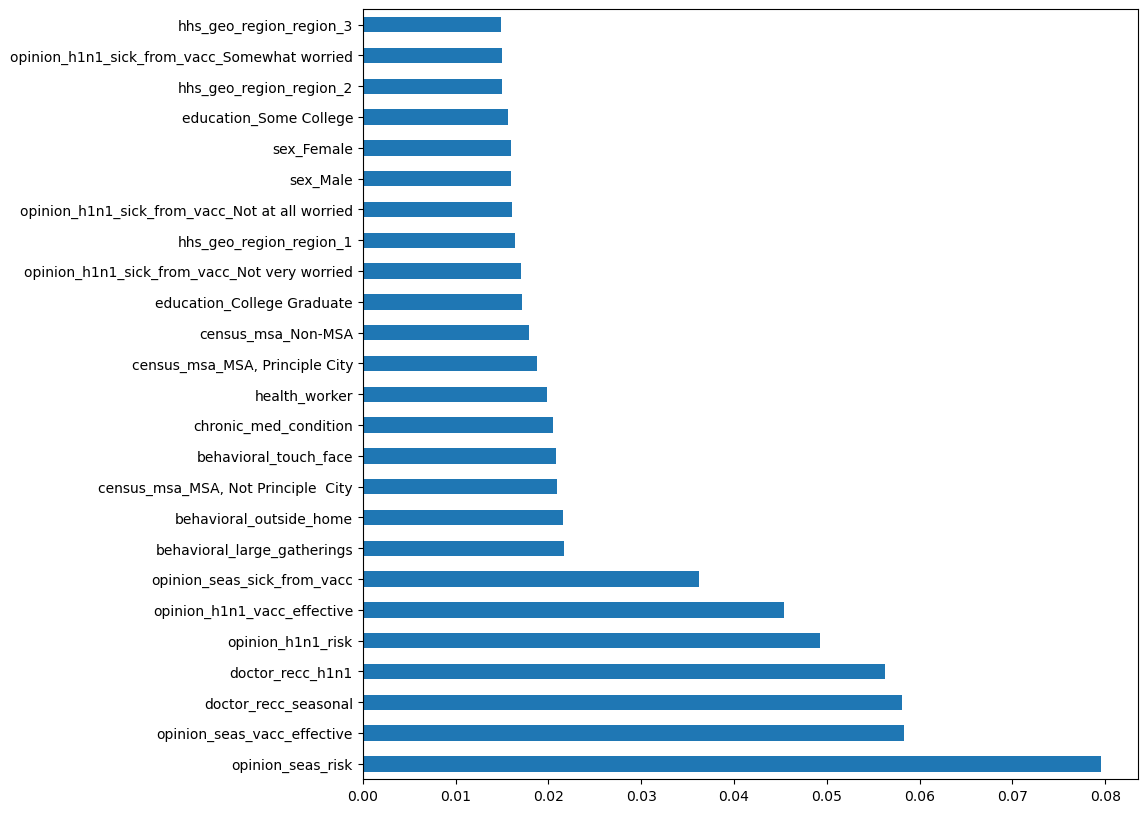

In [235]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show();

This particular process of feature importance has enabled us to understand how our data is distributed.

## 4.Modelling

### 4.1.Splitting our data into training and testing

The data at hand represents information about respondents in a survey that were asked questions about their backgrounds, opinions, and health behaviors. With the help of this data we want to predict whether an individual has received the H1N1 vaccine and seasonal flu vaccine.

We will train the model with the training features (X_train) and training labels (y_train) and give it some new data it hasn't seen before (X_test) to evaluate how well it classifies the new data.

As you can see below there's 26707 observations in the training set and 26708 in the test set.
This is somewhat uncommon, since the training/test split is usually 80%/20% for train and test respectively, or 70/30.
However it won't affect our workflow.

In [236]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [237]:
y_train

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
5303,0,1
2703,0,0
6586,0,0
22563,1,1
2338,1,1
...,...,...
21575,0,1
5390,0,0
860,0,0


### 4.2 KNearest Neighbours Classification

In [238]:
# Build a pipeline with StandardScaler and KNeighborsClassifier
scaled_pipeline_1 = Pipeline([('MMS',MinMaxScaler()),('KNC',KNeighborsClassifier())])

In [239]:
# Fit the training data to pipeline
scaled_pipeline_1.fit(x_train,y_train)

# Print the accuracy on test set
KN=scaled_pipeline_1.score(x_test,y_test)
KN

0.5659553226007737

### 4.3 Random Forest Classification

In [240]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('mms',MinMaxScaler()),('RF',RandomForestClassifier(random_state=123))])

In [241]:
# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [242]:
# Define a grid search
gridsearch = GridSearchCV(estimator=scaled_pipeline_2,
                          param_grid=grid,
                          scoring="accuracy",
                          cv=5)

In [243]:
# Fit the training data
gridsearch.fit(x_train,y_train)

# Print the accuracy on test set
GS=gridsearch.score(x_test,y_test)
GS

0.640084862099089

In [244]:
y_train.value_counts().sort_index()


h1n1_vaccine  seasonal_vaccine
0             0                   9263
              1                   5451
1             0                    667
              1                   3313
dtype: int64

### 4.4 XGBOOST Classification

In [245]:
x_train.head()

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,behavioral_antiviral_meds,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,hhs_geo_region_region_5,hhs_geo_region_region_6,hhs_geo_region_region_7,hhs_geo_region_region_8,hhs_geo_region_region_9,age_cat_elderly,age_cat_middleadults,age_cat_older adults,age_cat_young adults,age_cat_youth
respondent_id,,,,,,,,,,,,,,,,,,,,,
5303,4,1,5,2,2,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2703,4,2,2,5,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
6586,4,2,5,4,5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
22563,5,2,5,2,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2338,5,4,5,4,1,0,0,1,1,1,...,1,0,0,0,0,1,0,0,0,0


In [246]:
import re

In [247]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [248]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]

In [249]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

First, we're going to try Binary Relevance, which takes each label and splits into separate single class classification problems. 

In other words, we use all our same predictors for the h1n1_vaccine target, and then run the same model for the seasonal vaccine target.

In [250]:
y_pred = model.predict(x_test) 
XG=accuracy_score(y_test,y_pred)
XG

0.6619243728940472

### 4.5 BinaryRelevance Classification

In [251]:
from skmultilearn.problem_transform import BinaryRelevance

In [252]:
# Initializing

model_BR_LR = BinaryRelevance(LogisticRegression())

# Training

model_BR_LR.fit(x_train,y_train)

# Predicting

y_pred_BR_LR = model_BR_LR.predict(x_test)

# Testing

BR_LR = accuracy_score(y_test,y_pred_BR_LR)
BR_LR

0.6722825408710845

### 4.6 Naive Bayes Classification

In [253]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Initializing

model_BR_GNB = BinaryRelevance(GaussianNB())

# Training

model_BR_GNB.fit(x_train,y_train)

# Predicting

y_pred_BR_GNB = model_BR_GNB.predict(x_test)

# Testing

BR_GNB = accuracy_score(y_test,y_pred_BR_GNB)
BR_GNB

0.5875452389866467

### 4.7 MultiOutput Classification

In [254]:
#multioutput classifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import roc_curve, roc_auc_score
estimators = MultiOutputClassifier(
    estimator = LogisticRegression(penalty='l2', C=1))
full_pipeline = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('estimators', estimators),
])

In [255]:
#Training the model
full_pipeline.fit(x_train, y_train)

#Predict on evaluation set
preds = full_pipeline.predict_proba(x_test)
preds

[array([[0.92088831, 0.07911169],
        [0.92493103, 0.07506897],
        [0.94046944, 0.05953056],
        ...,
        [0.99564758, 0.00435242],
        [0.9632662 , 0.0367338 ],
        [0.87037792, 0.12962208]]),
 array([[0.77483645, 0.22516355],
        [0.76877921, 0.23122079],
        [0.13699371, 0.86300629],
        ...,
        [0.98011293, 0.01988707],
        [0.88125717, 0.11874283],
        [0.1081813 , 0.8918187 ]])]

In [256]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=y_test.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (8013, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
15772,0.079112,0.225164
9407,0.075069,0.231221
16515,0.059531,0.863006
23353,0.147012,0.209509
10008,0.126487,0.237774


In [257]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

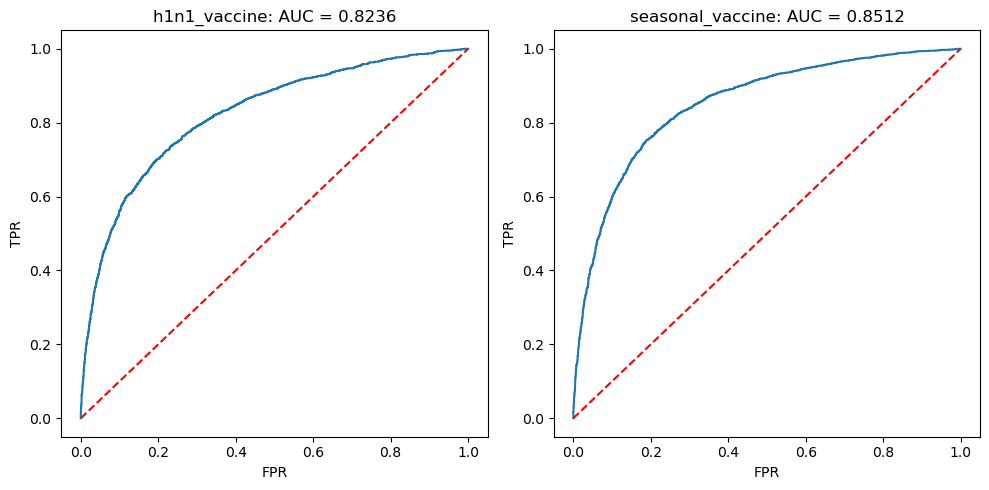

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plot_roc(
    y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()


In [259]:
roc_auc_score(y_test, y_preds)

0.837378830839246

An AUC score of 0.5 is no better than random, and an AUC score of 1.0 is a perfect model. Both models look like they generally perform similarly. Our scores of around 0.83 are not great, but they're not bad either!

The competition metric is the average between these two AUC values.

## 5. Evaluation

We used different models to come up with  a succesfull predictions,our succes metrics was based on the accuracy score  of above 65%  or an A_U_C score of above 70%.Listed below are the various models that we   used and their accuracy score
- KNeighborsClassifier with an accuracy score of 56.59%
-  Random forest classifier with an accuracy score of 64.00%
- XG boost with an accuracy score of 66%
-  BinaryRelevance(LogisticRegression) classifier with an accuracy score of 67%
-  BinaryRelevance guassian naive bayes with an accuracy score of 58..75%
- Multioutput classifier with an average auc of 83.73%

Hence we decided that the best model ,was the multioutput classifier  with an average AUC of 83.73 %

## 6. Deployment

## Retrain model on full dataset

Now that we have an idea of our performance, we'll want to retrain our model on the full dataset before generating our predictions on the test set.

In [260]:
full_pipeline.fit(features, labels)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

## 7. Reccomendations


Since vaccination is the main preventive strategy for influenza, optimizing formations and identifying factors that interfere with the administration of the vaccine is vital. Identifying factors that produce a priming effect and enhance response is important in understanding how to improve efficiency of influenza vaccine. Prospective safety monitoring followed by rigorous signal refinement is critical to inform decision making by regulatory and public health agencies.